# Gathering

In [1]:
import pandas as pd
import numpy as np
import requests 
import json
import os

In [2]:
# Import twitter-archive csv file into DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [4]:
# Import image-predictions tsv file into DataFrame
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
file_name= url.split('/')[-1]
file_name

'image-predictions.tsv'

In [5]:
if not os.path.isfile(file_name):
    with open(file_name , 'wb') as file:
        file.write(response.content)

In [6]:
image_prediction = pd.read_csv('image-predictions.tsv' , sep='\t')

In [7]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


NameError: name 'df_1' is not defined

In [9]:
#read tweet-json txt file line by line and convert to DataFrame
tweet_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        # Append to list of dictionaries
        tweet_list.append({'tweet_id': tweet['id'],
                        'retweet_count': tweet['retweet_count'],
                        'favorite_count': tweet['favorite_count'],
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
tweet_df = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [10]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
           ... 
Sonny         1
Maks          1
Arya          1
Flurpson      1
Deacon        1
Name: name, Length: 957, dtype: int64

In [15]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1477,693622659251335168,NaN,NaN,2016-01-31 02:31:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you keepin the popcorn bucket in your lap...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693622659...,10,10,None,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
2000,672488522314567680,NaN,NaN,2015-12-03 18:52:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Jackie. She was all ready to go out, b...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/672488522...,10,10,Jackie,None,None,None,None
1708,680798457301471234,NaN,NaN,2015-12-26 17:12:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Moofasa. He must be a powerful do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680798457...,6,10,Moofasa,None,None,None,None
1759,678740035362037760,NaN,NaN,2015-12-21 00:53:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tango. He's a large dog. Doesn't care muc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678740035...,6,10,Tango,None,None,None,None
1273,709207347839836162,NaN,NaN,2016-03-14 02:39:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's trying on her prom dress....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709207347...,11,10,Penny,None,None,None,None
2186,668981893510119424,NaN,NaN,2015-11-24 02:38:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Oddly shaped tail. Long pink ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668981893...,4,10,None,None,None,None,None
27,886736880519319552,NaN,NaN,2017-07-16 23:58:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mingus. He's a wonderful father to his...,NaN,NaN,NaN,"https://www.gofundme.com/mingusneedsus,https:/...",13,10,Mingus,None,None,None,None
1124,730211855403241472,NaN,NaN,2016-05-11 01:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ziva. She doesn't know how her collar ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730211855...,11,10,Ziva,None,None,None,None
1311,707021089608753152,NaN,NaN,2016-03-08 01:52:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's a Dasani Episcopalian. Go...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707021089...,12,10,Tucker,None,None,None,None


In [16]:
#to check if some records have more than one dog stage

print('both floofer and doggo:', len(twitter_archive[(twitter_archive.doggo != 'None') & (twitter_archive.floofer != 'None')]))

print('both doggo and pupper :',len(twitter_archive[(twitter_archive.doggo != 'None') & (twitter_archive.pupper != 'None')]))

print('both doggo and puppo :',len(twitter_archive[(twitter_archive.doggo != 'None') & (twitter_archive.puppo != 'None')]))

print('both floofer and pupper:',len(twitter_archive[(twitter_archive.floofer != 'None') & (twitter_archive.pupper != 'None')]))

print('both floofer and puppo:',len(twitter_archive[(twitter_archive.floofer != 'None') & (twitter_archive.puppo != 'None')]))

print('both pupper and puppo:',len(twitter_archive[(twitter_archive.pupper != 'None') & (twitter_archive.puppo != 'None')]))


both floofer and doggo: 1
both doggo and pupper : 12
both doggo and puppo : 1
both floofer and pupper: 0
both floofer and puppo: 0
both pupper and puppo: 0


In [17]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1396,767884188863397888,https://pbs.twimg.com/media/CqgSl4DWcAA-x-o.jpg,3,coral_reef,0.327740,False,cliff,0.157182,False,lakeside,0.048810,False
1729,820749716845686786,https://pbs.twimg.com/media/C2PjgjQXcAAc4Uu.jpg,2,golden_retriever,0.838012,True,Pekinese,0.056733,True,Labrador_retriever,0.023944,True
1586,797971864723324932,https://pbs.twimg.com/media/CxL3IWeVEAAAIE2.jpg,1,American_Staffordshire_terrier,0.489845,True,Chihuahua,0.305760,True,Staffordshire_bullterrier,0.072799,True
620,680473011644985345,https://pbs.twimg.com/media/CXGGlzvWYAArPfk.jpg,1,Lakeland_terrier,0.796694,True,West_Highland_white_terrier,0.138709,True,Norwich_terrier,0.016253,True
1563,793601777308463104,https://pbs.twimg.com/media/CwNwmxvXEAEJ54Z.jpg,1,miniature_pinscher,0.538981,True,Chihuahua,0.217830,True,toy_terrier,0.089149,True
595,679511351870550016,https://pbs.twimg.com/media/CW4b-GUWYAAa8QO.jpg,1,Chihuahua,0.761972,True,black-footed_ferret,0.150605,False,squirrel_monkey,0.028148,False
1991,873580283840344065,https://pbs.twimg.com/media/DB-UotKXkAEHXVi.jpg,1,Newfoundland,0.678537,True,Tibetan_mastiff,0.244022,True,chow,0.048530,True
339,672245253877968896,https://pbs.twimg.com/media/CVRLfeoW4AA_ldZ.jpg,1,Chihuahua,0.718944,True,badger,0.178546,False,toy_terrier,0.037103,True
733,686749460672679938,https://pbs.twimg.com/media/CYfS75fWAAAllde.jpg,1,cheeseburger,0.643808,False,hotdog,0.201378,False,bagel,0.063880,False
668,683030066213818368,https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg,1,boxer,0.722218,True,bull_mastiff,0.193804,True,French_bulldog,0.055194,True


In [18]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
tweet_df.sample(10)

,tweet_id,retweet_count,favorite_count
1055,742150209887731712,1783,5661
2121,670385711116361728,234,593
211,851861385021730816,23,0
1427,697596423848730625,1425,3306
149,863062471531167744,2687,8945
544,805826884734976000,2132,7335
941,752701944171524096,3291,0
1212,715200624753819648,2110,5578
570,801538201127157760,2391,9141
1656,683111407806746624,1034,3736


In [20]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [21]:
# Find duplicates in Image_prediction dataframe
image_prediction[image_prediction.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


## Quality issues
   #### In twitter_archive dataframe:
   - change timestamp to date_time format                                            
   - Data type issues in_reply_to_status_id, in_reply_to_user_id                     
   - rating_denominator has values less than 10 and more than 10 (like 1776)         
   - unnecessary html tags in source column                                          
   - some records have more than one dog stage                                       
   - many tweet_id(s) of twitter_archive table are missing in img_prediction table   
   - As twitter_arcive contains retweets,there was duplicates 
   - data type issues in tweet_id , in_reply_to_status_id and in_reply_to_user_id
 ### in image_prediction dataframe:
   -  Rename the columns with descriptive names                                      
   -  Remove duplicates in jpg_url column 
   -  data type issue in tweet_id
 ### in twitter_df
  - data type isuue in tweet_id

# Tidness
   ### in twitter_archive:
   -  doggo, floofer, pupper and puppo columns should be merged into one column named " dog_stage"                   
   - retweet_count and favorite_count columns from tweet_df table should be joined with twitter_archive table        
   - arc_clean dataframe  without any duplicate, so i realised that arc_clean have empty columns (retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp) which can be dropped                                       
   - "breed" column should be added in arc_clean table and put its values based on p1_conf and p1_dog columns of img_prediction table

# Cleaning

In [191]:
# Mahing copy of all  dataframes to start cleaning process
arc_clean = twitter_archive.copy()
img_clean= image_prediction.copy()
tweet_clean = tweet_df.copy() 

# Define
   ## Quality
   - change timestamp to date_time format


### Code

In [192]:
arc_clean['timestamp'] = pd.to_datetime(arc_clean['timestamp'])

### Test

In [193]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

## Define
  ### Quality
   - As twitter_arcive contains retweets,there was  duplicates , so we will check that then remove it by Keep only those rows in arc_clean dataframe that are original tweets and NOT retweets


### Code

In [194]:
arc_clean = arc_clean[arc_clean.retweeted_status_id.isnull()]

### Test

In [195]:
len(arc_clean[arc_clean.retweeted_status_id.isnull() == False])

0

## Define
 #### Quality
 - many tweet_id(s) of twitter_archive table are missing in img_prediction table , so we will keep records of tweet id in twitter_archive which exist in img_prediction table

### Code

In [196]:
arc_clean = arc_clean[arc_clean.tweet_id.isin(img_clean.tweet_id)]

### Test

In [197]:
len(arc_clean[~arc_clean.tweet_id.isin(img_clean.tweet_id)])

0

In [198]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1994 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   1994 non-null   datetime64[ns, UTC]
 4   source                      1994 non-null   object             
 5   text                        1994 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1994 non-null   object             
 10  rating_numerator            1994 non-null   int64           

## Define
   ### Tidness
   - arc_clean table without any duplicates have empty retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns, which can be dropped

### Code

In [199]:
arc_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [200]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  doggo                  1994 non-null   object             
 11  floofer                1994 non-null   object           

## Define
   ### Quality
   - Strip all html anchor tags (i.e. <a..></a>) in source column and retain just the text in between the tags then Convert the datatype from string to categorical.

### Code

In [201]:
arc_clean.source = arc_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')
arc_clean.source = arc_clean.source.astype('category')

### Test

In [202]:
arc_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [203]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   category           
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  doggo                  1994 non-null   object             
 11  floofer                1994 non-null   object           

# Define
  ## Tidness
   - doggo, floofer, pupper and puppo columns should be merged into one column named " dog_stage"                  


### Code

In [204]:
dog_stage = []

x = ['pupper', 'puppo', 'doggo', 'floof']
y = ['pupper', 'puppo', 'doggo', 'floof']

for row in arc_clean['text']:
    row = row.lower()
    for word in x:
        if word in str(row):
            dog_stage.append(y[x.index(word)])
            break
    else:
        dog_stage.append('None')

arc_clean['dog_stage'] = dog_stage

### Test

In [205]:
arc_clean['dog_stage'].value_counts()
arc_clean['dog_stage'] = arc_clean['dog_stage'].astype('category')

In [206]:
arc_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None


In [207]:
arc_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [208]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   category           
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  dog_stage              1994 non-null   category           
dtypes: category(2), datetime64[ns, UTC](1), float64(2), int6

# Define
  ## Quality
   -  rating_denominator has values less than 10 and more than 10 (like 1776), so we will fix it by make all denominator equal 10
 

### Code

In [209]:
arc_clean.rating_denominator = 10

### Test

In [210]:
arc_clean.rating_denominator.value_counts()

10    1994
Name: rating_denominator, dtype: int64

# Define
  ## Tidness
   - retweet_count and favorite_count columns from tweet_df table should be joined with twitter_archive table

### Code

In [211]:
arc_clean = pd.merge(arc_clean, tweet_clean, on=['tweet_id'], how= 'left')

### Test

In [212]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   category           
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  dog_stage              1994 non-null   category           
 11  retweet_count          1994 non-null   int64            

# Define
  ## Quality
  - Rename the columns with descriptive names

### Code

In [213]:
img_clean = img_clean.rename(columns = {'jpg_url':'image_url', 'img_num':'image_number', 'p1':'first_prediction', 'p2':'second_prediction', 'p3':'third_prediction', 'p1_conf':'first_prediction_confidence', 'p2_conf':'second_prediction_confidence', 'p3_conf':'third_prediction_confidence', 'p1_dog':'first_prediction_dog', 'p2_dog':'second_prediction_dog', 'p3_dog':'third_prediction_dog'})

### Test

In [214]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      2075 non-null   int64  
 1   image_url                     2075 non-null   object 
 2   image_number                  2075 non-null   int64  
 3   first_prediction              2075 non-null   object 
 4   first_prediction_confidence   2075 non-null   float64
 5   first_prediction_dog          2075 non-null   bool   
 6   second_prediction             2075 non-null   object 
 7   second_prediction_confidence  2075 non-null   float64
 8   second_prediction_dog         2075 non-null   bool   
 9   third_prediction              2075 non-null   object 
 10  third_prediction_confidence   2075 non-null   float64
 11  third_prediction_dog          2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.

In [215]:
img_clean[img_clean.image_url.duplicated()]

,tweet_id,image_url,image_number,first_prediction,first_prediction_confidence,first_prediction_dog,second_prediction,second_prediction_confidence,second_prediction_dog,third_prediction,third_prediction_confidence,third_prediction_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [216]:
arc_clean.dog_stage.value_counts()

None      1625
pupper     237
doggo       69
floof       34
puppo       29
Name: dog_stage, dtype: int64

# Define
  ## Quality
   - detect and remove duplicates rows in image_prediction(image_url column) table using drop_duplicated  

### Code

In [217]:
img_clean[img_clean.image_url.duplicated()]

,tweet_id,image_url,image_number,first_prediction,first_prediction_confidence,first_prediction_dog,second_prediction,second_prediction_confidence,second_prediction_dog,third_prediction,third_prediction_confidence,third_prediction_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [218]:
img_clean.drop_duplicates('image_url' , inplace = True)

### Test

In [219]:
img_clean[img_clean.image_url.duplicated()]

,tweet_id,image_url,image_number,first_prediction,first_prediction_confidence,first_prediction_dog,second_prediction,second_prediction_confidence,second_prediction_dog,third_prediction,third_prediction_confidence,third_prediction_dog


In [220]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      2009 non-null   int64  
 1   image_url                     2009 non-null   object 
 2   image_number                  2009 non-null   int64  
 3   first_prediction              2009 non-null   object 
 4   first_prediction_confidence   2009 non-null   float64
 5   first_prediction_dog          2009 non-null   bool   
 6   second_prediction             2009 non-null   object 
 7   second_prediction_confidence  2009 non-null   float64
 8   second_prediction_dog         2009 non-null   bool   
 9   third_prediction              2009 non-null   object 
 10  third_prediction_confidence   2009 non-null   float64
 11  third_prediction_dog          2009 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.

In [221]:
# Match tweet_id in arc_clean table with tweet_id in img_clean tabe to get best analysis of data
img_clean = img_clean[img_clean.tweet_id.isin(arc_clean.tweet_id)]

In [222]:
#To check the result of matching tweet_id of two dataframes
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      1994 non-null   int64  
 1   image_url                     1994 non-null   object 
 2   image_number                  1994 non-null   int64  
 3   first_prediction              1994 non-null   object 
 4   first_prediction_confidence   1994 non-null   float64
 5   first_prediction_dog          1994 non-null   bool   
 6   second_prediction             1994 non-null   object 
 7   second_prediction_confidence  1994 non-null   float64
 8   second_prediction_dog         1994 non-null   bool   
 9   third_prediction              1994 non-null   object 
 10  third_prediction_confidence   1994 non-null   float64
 11  third_prediction_dog          1994 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 161.

# Define
  ## Tidness
  - "breed" column should be added in arc_clean table and put its values based on p1_conf and p1_dog columns of img_prediction table
    


### Code

In [223]:
# first_prediction_confidence > second_prediction_confidence > third_prediction_confidence
tweet = []
breed = []
for i in range(len(img_clean)):
    if img_clean.first_prediction_dog.iloc[i]== True:
        tweet.append(img_clean.tweet_id.iloc[i])
        breed.append(img_clean.first_prediction.iloc[i])
    
    elif img_clean.second_prediction_dog.iloc[i]== True:
        tweet.append(img_clean.tweet_id.iloc[i])
        breed.append(img_clean.second_prediction.iloc[i])
    
    elif img_clean.third_prediction_dog.iloc[i]== True:
        tweet.append(img_clean.tweet_id.iloc[i])
        breed.append(img_clean.third_prediction.iloc[i])
    
    else:
        tweet.append(img_clean.tweet_id.iloc[i])
        breed.append('Unidentifiable')


In [224]:
dogs_breed={'tweet_id':tweet , 'breed':breed}

In [225]:
df = pd.DataFrame(dogs_breed)

In [226]:
# Merging two dataframes arc_clean and df 
arc_clean = pd.merge(arc_clean, df , on=['tweet_id'], how= 'left')

### Test

In [227]:
arc_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,39467,Unidentifiable
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,33819,Chihuahua


In [228]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   category           
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  dog_stage              1994 non-null   category           
 11  retweet_count          1994 non-null   int64            

In [229]:
arc_clean.dog_stage.value_counts()

None      1625
pupper     237
doggo       69
floof       34
puppo       29
Name: dog_stage, dtype: int64

# Define 
  ## Quality
  #### in twitter_archive
  - Data type issues in tweet_id , retweeted_status_id, retweeted_status_user_id
  #### in image_prediction
  - tweet_id
  #### in tweet_df
  - tweet_id

### Code

In [230]:
arc_clean['tweet_id'] = arc_clean['tweet_id'].apply(str)

arc_clean['in_reply_to_status_id'] = arc_clean['in_reply_to_status_id'].apply(str)

arc_clean['in_reply_to_user_id'] = arc_clean['in_reply_to_user_id'].apply(str)


img_clean['tweet_id'] = img_clean['tweet_id'].apply(str)

tweet_clean['tweet_id'] = tweet_clean['tweet_id'].apply(str)

### Test

In [231]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  1994 non-null   object             
 2   in_reply_to_user_id    1994 non-null   object             
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   category           
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  dog_stage              1994 non-null   category           
 11  retweet_count          1994 non-null   int64            

In [232]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      1994 non-null   object 
 1   image_url                     1994 non-null   object 
 2   image_number                  1994 non-null   int64  
 3   first_prediction              1994 non-null   object 
 4   first_prediction_confidence   1994 non-null   float64
 5   first_prediction_dog          1994 non-null   bool   
 6   second_prediction             1994 non-null   object 
 7   second_prediction_confidence  1994 non-null   float64
 8   second_prediction_dog         1994 non-null   bool   
 9   third_prediction              1994 non-null   object 
 10  third_prediction_confidence   1994 non-null   float64
 11  third_prediction_dog          1994 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 161.

In [233]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


# Storing Data

In [234]:
arc_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# Analyzing Data

In [235]:
df_analysis = arc_clean.copy()

### Analyzing number of tweets posted by WeRateDogs' over time

In [236]:
df_analysis['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    296
2015-12    367
2016-01    169
2016-02    111
2016-03    120
2016-04     54
2016-05     57
2016-06     81
2016-07     88
2016-08     59
2016-09     63
2016-10     65
2016-11     53
2016-12     54
2017-01     66
2017-02     64
2017-03     48
2017-04     41
2017-05     43
2017-06     44
2017-07     49
2017-08      2
Name: timestamp, dtype: int64

### Most used Twitter source 

In [237]:
df_analysis['source'].value_counts().sort_index(ascending = False)

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### Analysis of Retweet and favorite count

In [238]:
print('Mean Retweet Count: ', int(df_analysis.retweet_count.mean()))
print('Mean Favorite Count: ',int(df_analysis.favorite_count.mean()))

Mean Retweet Count:  2766
Mean Favorite Count:  8895


### Analysis of Retweet and favorite counts depend on dog stage

In [239]:
print('Doggo')
print('Mean Retweet Count: ',  int(df_analysis.retweet_count[df_analysis.dog_stage == 'doggo'].mean()) )
print('Mean Favorite Count: ', int(df_analysis.favorite_count[df_analysis.dog_stage == 'doggo'].mean()),'\n')

print('Floof')
print('Mean Retweet Count: ',int(df_analysis.retweet_count[df_analysis.dog_stage == 'floof'].mean()))
print('Mean Favorite Count: ',int(df_analysis.favorite_count[df_analysis.dog_stage == 'floof'].mean()),'\n')

    

print('Pupper')
print('Mean Retweet Count: ', int(df_analysis.retweet_count[df_analysis.dog_stage == 'pupper'].mean()))
print('Mean Favorite Count: ', int(df_analysis.favorite_count[df_analysis.dog_stage == 'pupper'].mean()),'\n')

print('Puppo')
print('Mean Retweet Count: ', int(df_analysis.retweet_count[df_analysis.dog_stage == 'puppo'].mean()))
print('Mean Favorite Count: ', int(df_analysis.favorite_count[df_analysis.dog_stage == 'puppo'].mean()),'\n')

Doggo
Mean Retweet Count:  6737
Mean Favorite Count:  18340 

Floof
Mean Retweet Count:  2889
Mean Favorite Count:  9126 

Pupper
Mean Retweet Count:  2363
Mean Favorite Count:  7239 

Puppo
Mean Retweet Count:  6692
Mean Favorite Count:  22655 



### Analysis retweet and favorite counts for ratings more than 10

In [240]:
print('Retweet and favorite counts for ratings more than 10')
print('Mean Retweet Count: ', int(df_analysis.retweet_count[df_analysis.rating_numerator > 10].mean()))
print('Mean Favorite Count: ', int(df_analysis.favorite_count[df_analysis.rating_numerator > 10].mean()))

Retweet and favorite counts for ratings more than 10
Mean Retweet Count:  3837
Mean Favorite Count:  12770


### Analysis retweet and favorite counts for ratings less than 10

In [241]:
print('Retweet and favorite counts for ratings less than 10')
print('Mean Retweet Count: ', int(df_analysis.retweet_count[df_analysis.rating_numerator < 10].mean()))
print('Mean Favorite Count: ', int(df_analysis.favorite_count[df_analysis.rating_numerator < 10].mean()))

Retweet and favorite counts for ratings less than 10
Mean Retweet Count:  1035
Mean Favorite Count:  2854


# Visualizing Data

In [242]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]


### Visualize WeRateDogs tweeting trend over time

(0.0, 22.05)

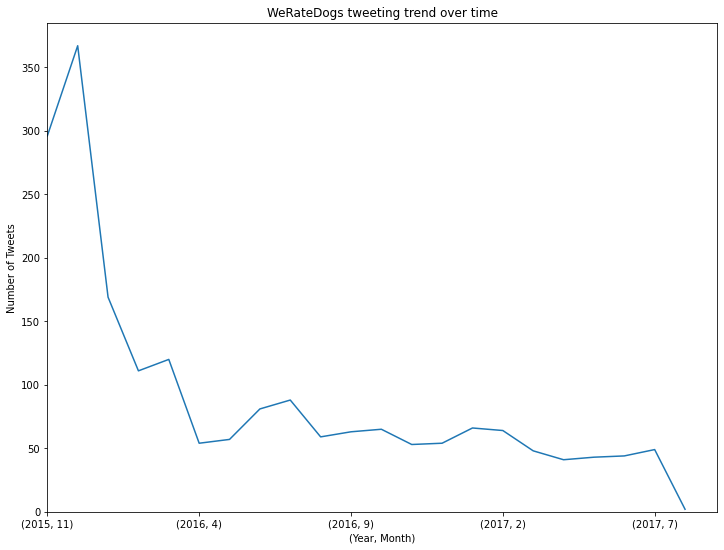

In [243]:
data= df_analysis.tweet_id.groupby([df_analysis["timestamp"].dt.year, df_analysis["timestamp"].dt.month]).count()
trend_tweet = data.plot(kind ='line', title='WeRateDogs tweeting trend over time')
trend_tweet.set_xlabel("(Year, Month)")
trend_tweet.set_ylabel("Number of Tweets")
trend_tweet.set_ylim(0.0)
trend_tweet.set_xlim(0.0)

### Visualize most used twitter source

Text(0.5, 0, 'Number of Tweets')

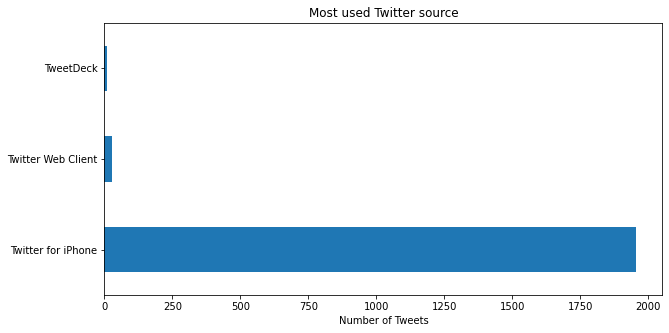

In [244]:
df_analysis['source'].value_counts().plot(kind ='barh', figsize=(10,5), title='Most used Twitter source').set_xlabel("Number of Tweets")

### Visualize retweets and favorites counts trend over time

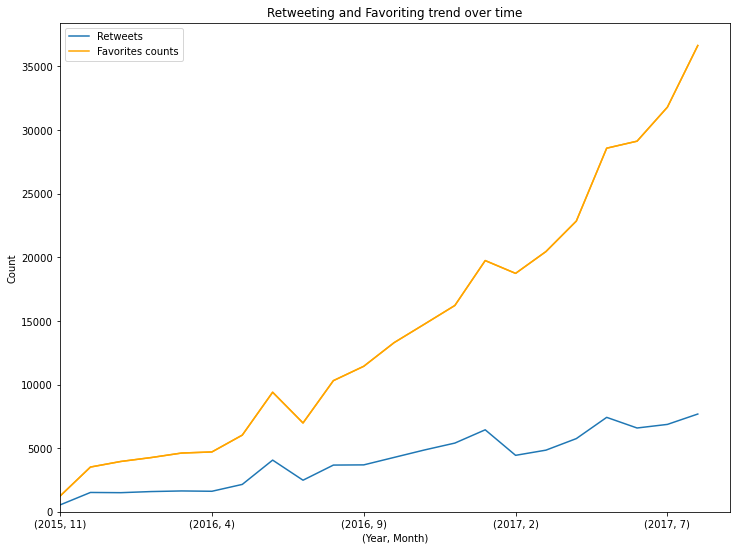

In [245]:
df_analysis.retweet_count.groupby([df_analysis["timestamp"].dt.year, df_analysis["timestamp"].dt.month]).mean().plot(kind ='line')
df_analysis.favorite_count.groupby([df_analysis["timestamp"].dt.year, df_analysis["timestamp"].dt.month]).mean().plot(kind ='line' , color ='orange').set_xlim(0, ) 
df_analysis.favorite_count.groupby([df_analysis["timestamp"].dt.year, df_analysis["timestamp"].dt.month]).mean().plot(kind ='line' , color = 'orange').set_ylim(0, ) 
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites counts'))